EDA

In [17]:
print("python")


python


Reading CSV file

In [18]:
import pandas as pd
df=pd.read_csv("retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


Checking for null value

In [19]:
print(df.isnull().values.any())

False


creating  week days

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df.drop('Date', axis=1, inplace=True)

drop irrelevant column

In [21]:
df.drop('Store ID', axis=1, inplace=True)
df.drop('Product ID', axis=1, inplace=True)

checking unique columns

In [22]:
total_unique = df['Category'].nunique()
total_unique

5

boxplot for visualize the outliars



{'whiskers': [<matplotlib.lines.Line2D at 0x171d4a070>,
 'caps': [<matplotlib.lines.Line2D at 0x171d4a5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171d3ad90>],
 'medians': [<matplotlib.lines.Line2D at 0x171d4aaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x171d4ad90>],
 'means': []}

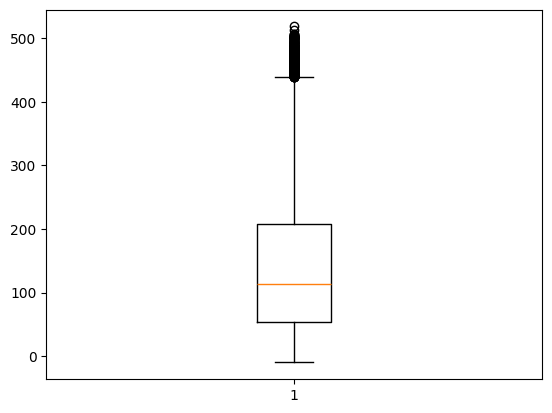

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(df['Demand Forecast'])

checking no of outliars

In [24]:
q1=df['Demand Forecast'].quantile(0.25)
q3=df['Demand Forecast'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
counter=0
for i in range(len(df['Demand Forecast'])):
    if df['Demand Forecast'][i]>upper or df['Demand Forecast'][i]<lower:
        counter+=1

print("no of outliers:", counter)


no of outliers: 732


percentage of  outliars

In [25]:
(counter/len(df))*100

1.0013679890560876

removing 732 outliars

In [26]:
dfc = df[(df['Demand Forecast'] >= lower) & (df['Demand Forecast'] <= upper)]

print(len(df) - len(dfc))

732


one hot encoding on categorial columns


In [27]:
x= pd.get_dummies(dfc.drop("Demand Forecast", axis=1), drop_first=True)

target value

In [28]:
y = dfc["Demand Forecast"]

splitting

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training

training

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

evaluation


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 7.615829639353324
MSE: 78.74824923951361
R2 Score: 0.9927210320966039


cross validation



In [32]:
from sklearn.model_selection import KFold, cross_val_score

# Cross-validation check
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

print("R2 Scores for each fold:", cv_scores)
print("Average R2 across folds:", cv_scores.mean())


R2 Scores for each fold: [0.99271593 0.9927571  0.99299941 0.99283641 0.99275904]
Average R2 across folds: 0.9928135804015694
